In [23]:
import pandas as pd

In [24]:
train = pd.read_csv("train.csv")

In [25]:
train['label_2'].fillna(train['label_2'].mean(), inplace=True)

In [26]:
train['label_2'] = train['label_2'].astype(int)

In [27]:
train.dropna(subset=['label_4'], inplace=True)

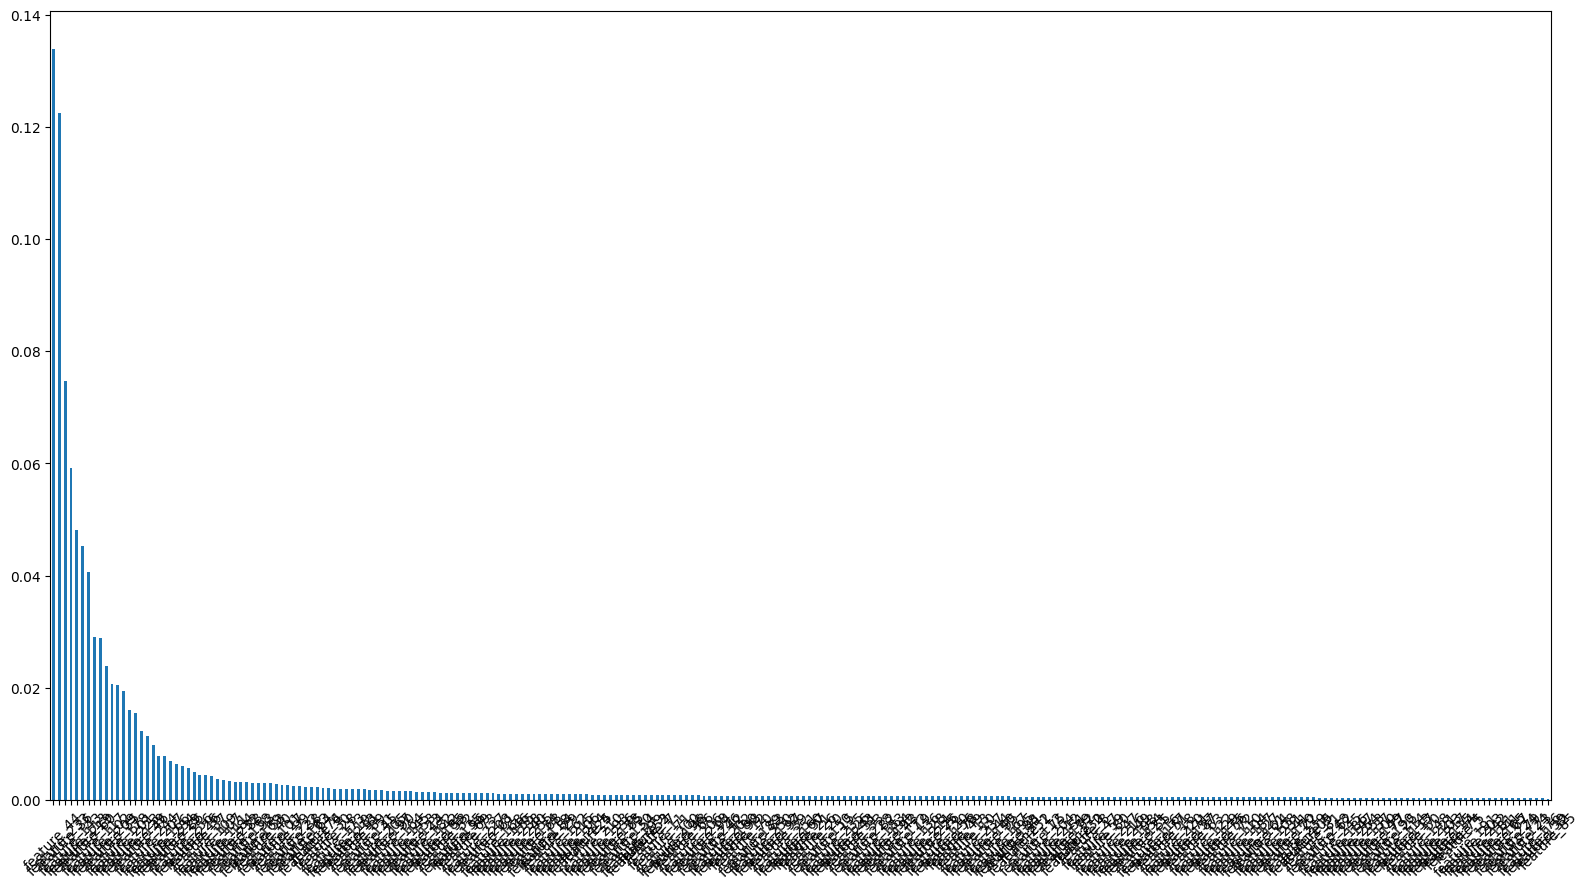

In [16]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

X = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y = train['label_3']

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()


In [17]:
importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

threshold = 0.005

selected_features = f_importances[f_importances > threshold]

X_selected = X[selected_features.index]

In [18]:
from sklearn import svm

In [19]:
def train_model(X, y):
    model = svm.SVC(random_state=42)
    model.fit(X, y)

    print(f"Training score: {model.score(X, y)}")
    print(f"Testing score: {model.score(X, y)}")

    return model

In [20]:
model1=train_model(X_selected, y)

Training score: 0.9967741935483871
Testing score: 0.9967741935483871


In [21]:
test = pd.read_csv("test.csv")

In [22]:
test = test[test.columns.difference(['label_1', 'label_2', 'label_3', 'label_4'])]

In [32]:
test['label_3'] = model1.predict(test[selected_features.index])

In [33]:
test.head()

,feature_1,feature_10,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,label_1,label_3
0,-1.141206,-2.729526,-0.972009,0.580536,-0.115635,-1.060545,0.891455,-2.766417,2.061118,1.610883,...,2.060720,2.774699,-0.303661,1.786763,2.831582,-1.136554,1.235363,1.902969,1,1
1,-1.796767,-3.461282,2.192923,2.805736,1.450816,-1.428263,-0.077756,-3.216417,3.504671,-0.096254,...,0.487922,2.843604,1.927416,-1.154412,2.567402,0.766687,3.159991,0.387435,1,1
2,-1.388968,-3.081147,2.695518,0.815327,1.586289,-1.174928,0.801264,-1.502470,4.188352,-1.366310,...,-0.271318,0.983235,1.238104,-0.637527,0.716910,-0.756478,2.857820,0.928647,1,1
3,1.276844,-1.714863,1.803796,1.784700,2.889847,0.434343,-0.837194,-1.697381,4.092119,0.647607,...,1.439383,0.105901,0.526721,-0.115114,1.458338,-0.217736,1.451269,0.862430,1,1
4,-1.560815,-2.258071,1.701123,2.165399,0.240543,-0.597141,-0.173436,-2.190523,4.369282,0.300367,...,0.972563,2.888189,1.834922,0.636656,2.573324,0.023985,0.696921,0.883026,1,1


In [31]:
test.to_csv('test_with_predictions_label3.csv', index=False)